# Principals of Data Analytics Assessment
### Author: Colleen King

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv('data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
print(f'Number of rows: {len(df)}')
print(f'Number of columns: {len(df.columns)}')

Number of rows: 344
Number of columns: 7


In [3]:
list(set(df.species))

['Chinstrap', 'Adelie', 'Gentoo']

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
(Illustrations retrieved from https://allisonhorst.github.io/palmerpenguins/)

In [4]:
list(set(df.island))

['Torgersen', 'Biscoe', 'Dream']

The Palmer penguin data contains 344 rows of data across 7 columns. This dataset contains physical measurements of penguins collected by researchers at the Palmer station in Antarctica.

The variables found in the dataset are:

- species: the species of penguin - the dataset contains 3; Chinstrap, Adelie, and Gentoo
- island: the island where the measurement was obtained - the dataset contains 3; Torgersen, Biscoe, and Dream
- bill_length_mm: the length of the penguin's bill measured in millimeters
- bill_depth_mm: the depth of the penguin's bill measured in millimeters
- flipper_length_mm: the length of the penguin's flipper measured in millimeters
- body_mass_g: the body mass of the penguin measured in grams
- sex: the sex of the penguin (M/F)

---

Measurements for bill length and depth can be more clearly understood with the following diagram, retrieved from https://allisonhorst.github.io/palmerpenguins/

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

It can be seen from running df.head() that some of the rows contain missing values. There are 11 of these in total over the whole dataset, and these should be removed before any further analysis.

In [8]:
# https://saturncloud.io/blog/python-pandas-selecting-rows-whose-column-value-is-null-none-nan/
print(f'Number of rows containing null values: {sum(df.isnull().any(axis=1))}')

Number of rows containing null values: 11


In [20]:
df = df[~df.isnull().any(axis=1)]
print(f'Number of rows: {len(df)}')
df.head()

Number of rows: 333


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


---

In [13]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

The data is stored in a number of different types.

Pandas stores the species, island, and sex as object type. This makes sense as these are all text data, so it should be stored as strings.
An equivalent encoding could be used to store this data either, such as Adelie = 0, Gentoo = 1, etc. In this scenario these columns could be stored and processed as integers. In the case of sex, as there are only two values this column can take, a boolean encoding would be a valid representation of this data either.

The bill length, bill depth, flipper length, and body mass are automatically treated as floats by pandas. This is sensible as these are all numeric data. For bill length and bill depth float is the natual datatype choice as their values have decimal points, however, flipper length and body mass are both reported in grams with 0s after the decimal point. These two columns could be treated as integers without any loss of information. It can be seen that for both of these columns, casting them to an int is equal to the default float representation.


In [18]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# check if changing the variables to integer makes them different from the float default
body_mass_equal = all(df.astype({'body_mass_g': int})['body_mass_g'] == df['body_mass_g'])
flipper_length_equal = all(df.astype({'flipper_length_mm': int})['flipper_length_mm'] == df['flipper_length_mm'])

print(f'Integer body mass = float body mass: {body_mass_equal}')
print(f'Integer flipper length = float flipper length: {flipper_length_equal}')

Integer body mass = float body mass: True
Integer flipper length = float flipper length: True


---

By plotting certain columns we can learn more about the dataset - we can see how many measurements were on each island, how many measurements were taken of each species of penguin, and the distribution of measurements across the two sexes using barplots. This type of plot is appropriate for these categorical variables.

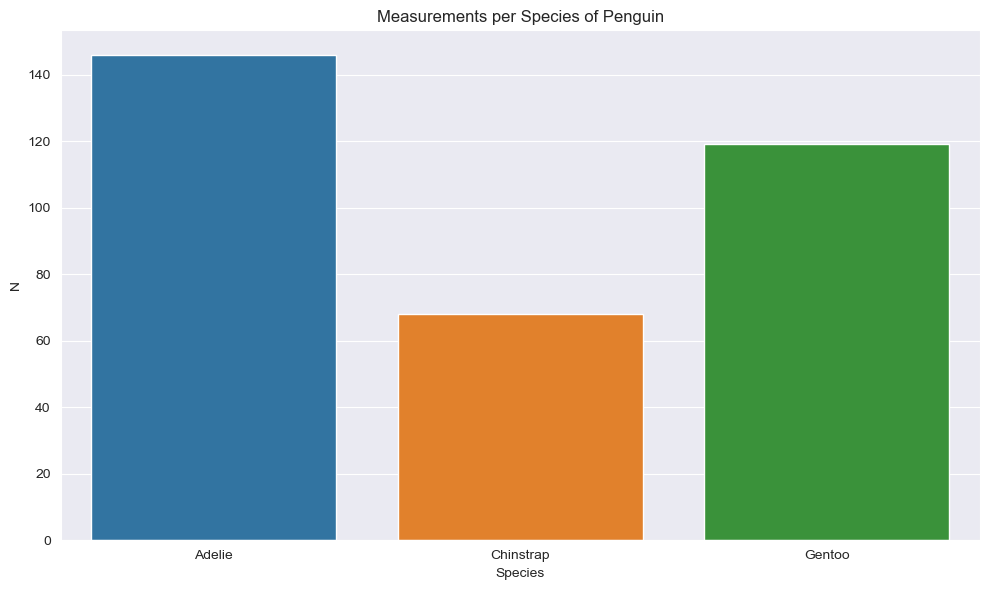

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='species')
plt.title('Measurements per Species of Penguin')
plt.ylabel('N')
plt.xlabel('Species')
plt.tight_layout()
plt.show()

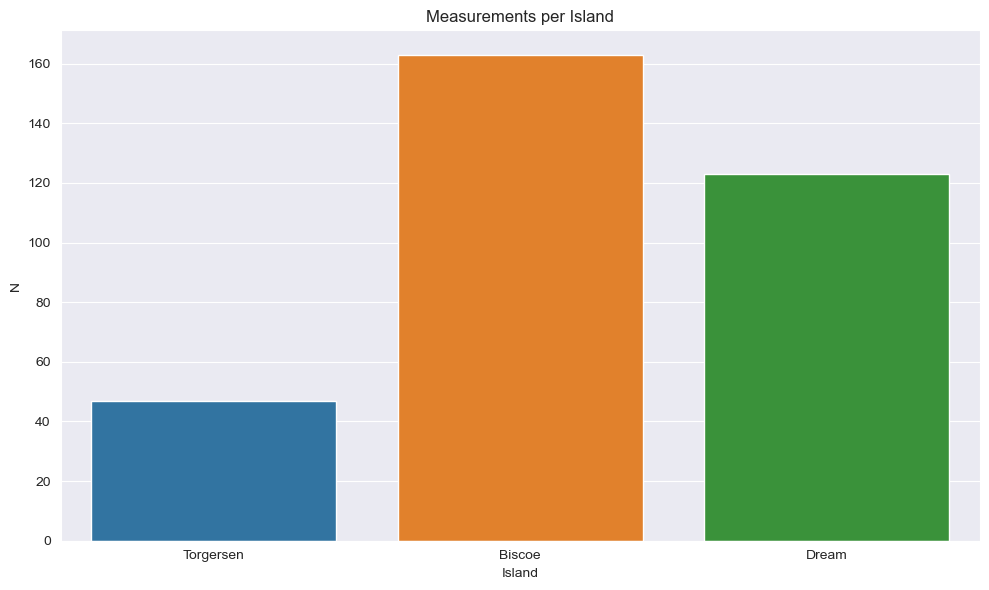

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='island')
plt.title('Measurements per Island')
plt.ylabel('N')
plt.xlabel('Island')
plt.tight_layout()
plt.show()

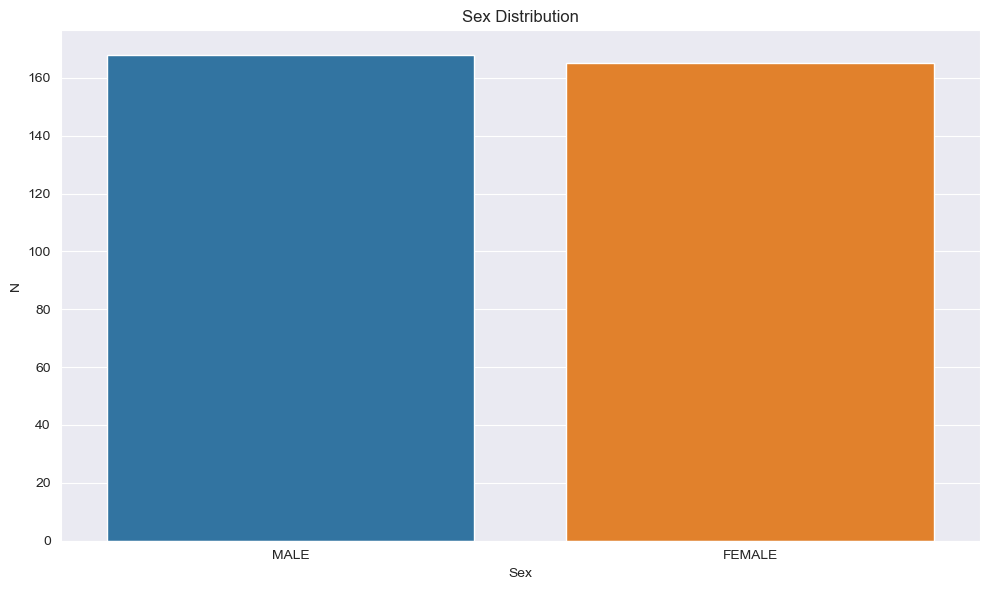

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sex')
plt.title('Sex Distribution')
plt.ylabel('N')
plt.xlabel('Sex')
plt.tight_layout()
plt.show()

From the above charts, it can be seen that the most commonly measured species of penguin was Adelie, followed by Gentoo, and the least represented species was Chinstrap.

Most measurements occurred on Biscoe, followed by Dream, and finally Torgersen.

Also, the split by sex is roughly equal between male and female.

---

Using histograms, we can analyse the numeric columns to learn more about how their values are distributed.

A plot of the distribution of bill length shows that the lenghts fall within a range of 3-6 cm, with most bills having a length between 3.5 and 5.5 cm.

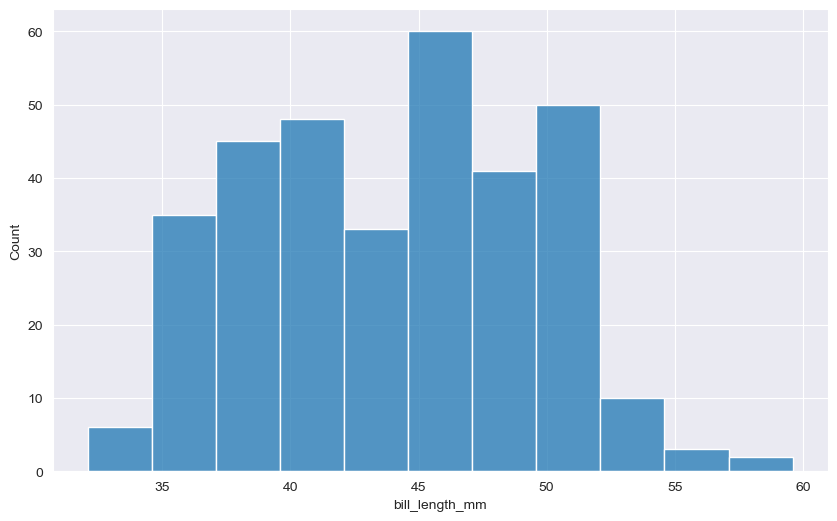

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bill_length_mm')
plt.show()

The average length of the bill is dependent on the species in question however. By colouring each distribution by the species, we can see that Adelie penguins have a shorter bill on average than Chinstraps or Gentoos.

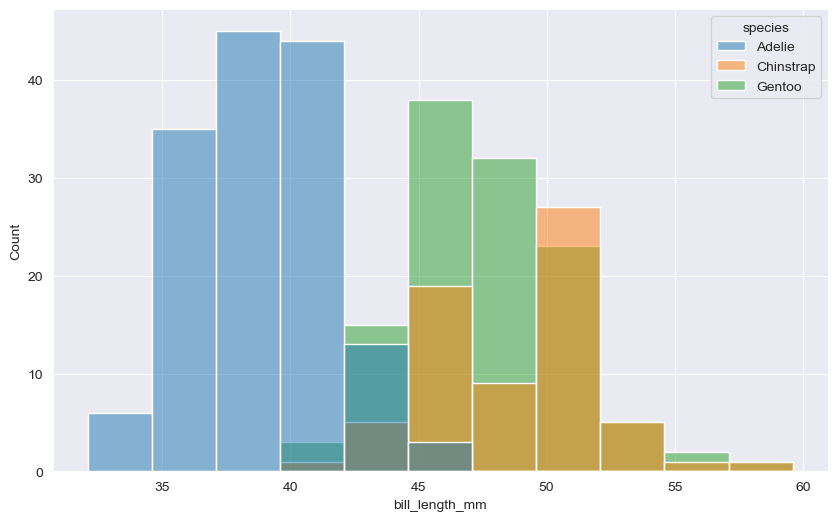

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bill_length_mm', hue='species')
plt.title('Bill Length Distribution by species')
plt.ylabel('N')
plt.xlabel('Species')
plt.tight_layout()
plt.show()

Similarly, we can se the species differences in bill depth - Gentoo penguins have on average shallower bills (14.99mm on average) than Adelies or Chinstraps, who have typical bill depths of between 17 and 20 mm (averages of 18.35mm and 18.42mm respectively).

In [41]:
df.groupby('species')[['bill_depth_mm', 'bill_length_mm']].agg(np.mean)

,bill_depth_mm,bill_length_mm
species,,
Adelie,18.347260,38.823973
Chinstrap,18.420588,48.833824
Gentoo,14.996639,47.568067


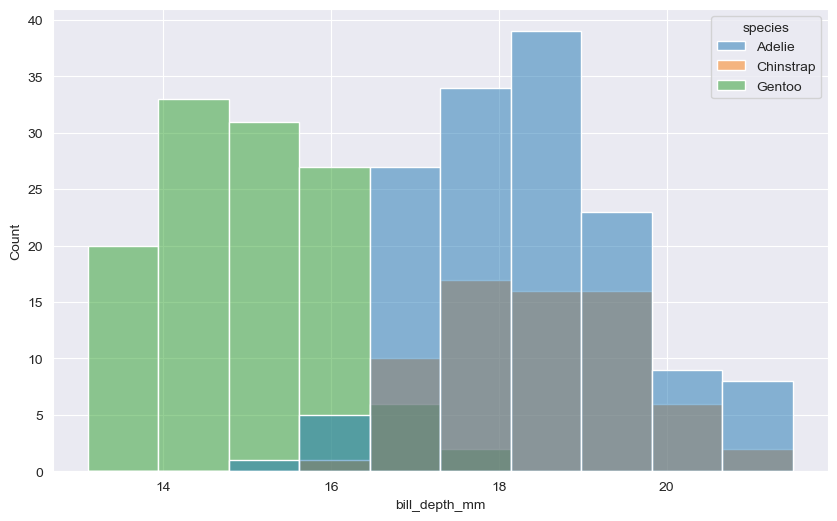

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='bill_depth_mm', hue='species')
plt.show()

## References:
- https://pandas.pydata.org/
- https://allisonhorst.github.io/palmerpenguins/
- https://stackoverflow.com/questions/7225900/how-can-i-install-packages-using-pip-according-to-the-requirements-txt-file-from
- https://saturncloud.io/blog/python-pandas-selecting-rows-whose-column-value-is-null-none-nan/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
- https://seaborn.pydata.org/generated/seaborn.barplot.html
- https://seaborn.pydata.org/generated/seaborn.set_style.html
